# Ch 0. Python與機器學習
## 0-4. 基礎數學與Python實作
[0-4-2. 敘述統計](#sec0_4_2)
***

<a id='sec0_4_2'></a>
### 0-4-2. 敘述統計

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_csv("pokemon_894_12.csv", header=0)
df.head()

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80,82,83,100,100,80,1,False
3,3,妙蛙花Mega,Grass,Poison,80,100,123,122,120,80,1,False
4,4,小火龍,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
df.info()  # 可看出 Type2 特徵有遺漏值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      894 non-null    int64 
 1   Name        894 non-null    object
 2   Type1       894 non-null    object
 3   Type2       473 non-null    object
 4   HP          894 non-null    int64 
 5   Attack      894 non-null    int64 
 6   Defense     894 non-null    int64 
 7   SpecialAtk  894 non-null    int64 
 8   SpecialDef  894 non-null    int64 
 9   Speed       894 non-null    int64 
 10  Generation  894 non-null    int64 
 11  Legendary   894 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 77.8+ KB


In [4]:
df.loc[:, 'HP':'SpecialDef'].describe()

,HP,Attack,Defense,SpecialAtk,SpecialDef
count,894.000000,894.000000,894.000000,894.000000,894.000000
mean,69.469799,79.848993,74.420582,73.428412,72.401566
std,25.670988,32.691003,31.323902,33.110134,27.963359
min,1.000000,5.000000,5.000000,10.000000,20.000000
25%,50.000000,55.000000,50.000000,50.000000,50.000000
50%,66.000000,75.000000,70.000000,65.000000,70.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000


In [5]:
# 計算平均值
print('HP平均值：', df['HP'].mean())

HP平均值： 69.46979865771812


In [6]:
# 計算中位數
print('HP中位數：', df['HP'].median())

HP中位數： 66.0


In [7]:
# 計算眾數
print('HP眾數：', df['HP'].mode())

HP眾數： 0    60
dtype: int64


上述例子中，HP 的眾數是 60。最前面顯示的 0 是索引值，當有多個眾數時會逐一顯示，索引值會以流水號遞增。

In [8]:
# 計算最大值，最小值與全距(range)
print('HP最大值：', df['HP'].max())
print('HP最小值：', df['HP'].min())
print('HP全距：', df['HP'].max()-df['HP'].min())

HP最大值： 255
HP最小值： 1
HP全距： 254


In [9]:
# 計算四分位數
print('HP第1四分位數：', df['HP'].quantile(q=.25))
print('HP第3四分位數：', df['HP'].quantile(q=.75))
# 也可透過 describe() 取出
print('HP第3四分位數：', df['HP'].describe()[6])

HP第1四分位數： 50.0
HP第3四分位數： 80.0
HP第3四分位數： 80.0


In [10]:
# 計算變異數、標準差
print('HP變異數：', df['HP'].var())
print('HP標準差：', df['HP'].std())

HP變異數： 658.9996467679268
HP標準差： 25.670988426001966


想知道 HP 與 Defense 是否有相反的關係，例如：
- 幸運蛋：HP = 255, Def = 10
- 壺壺：HP = 20, Def = 230

In [11]:
print('Covariance matrix:')
print(np.cov(df['HP'], df['Defense']))
print('Correlation coefficients:')
print(np.corrcoef(df['HP'], df['Defense']))

Covariance matrix:
[[658.99964677 191.94216764]
 [191.94216764 981.18685476]]
Correlation coefficients:
[[1.         0.23869974]
 [0.23869974 1.        ]]


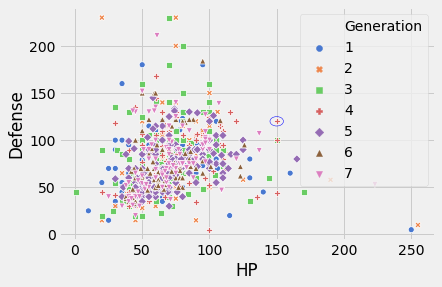

In [12]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

cmap = sns.color_palette("muted", n_colors=7)
sns.scatterplot(x='HP', y='Defense',
                data=df,
                hue='Generation',
                style='Generation',
                palette=cmap)

circle2 = plt.Circle((150, 120), 5, color='b', fill=False)
ax = plt.gca()
ax.add_artist(circle2)

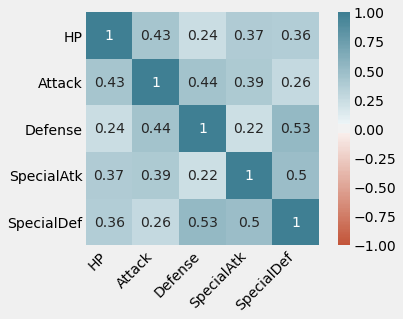

In [13]:
corr = df.loc[:, 'HP':'SpecialDef'].corr()
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

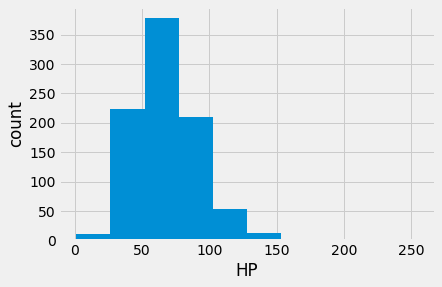

In [14]:
# 直方圖
plt.hist(df['HP'])
plt.xlabel('HP')
plt.ylabel('count');

In [15]:
df.loc[:, 'HP':'Speed'].T

,0,1,2,3,4,5,6,7,8,9,...,884,885,886,887,888,889,890,891,892,893
HP,45,60,80,80,39,58,78,78,78,44,...,97,97,97,80,90,67,73,61,53,88
Attack,49,62,82,100,52,64,84,130,104,48,...,157,113,167,95,125,73,73,131,127,112
Defense,49,63,83,123,43,58,78,111,78,65,...,127,109,97,115,80,67,73,211,53,75
SpecialAtk,65,80,100,122,60,80,109,130,159,50,...,113,157,167,130,90,73,127,53,151,102
SpecialDef,65,80,100,120,50,65,85,85,115,64,...,109,127,97,115,90,67,73,101,79,80
Speed,45,60,80,80,65,80,100,100,100,43,...,77,77,129,65,125,73,121,13,107,143


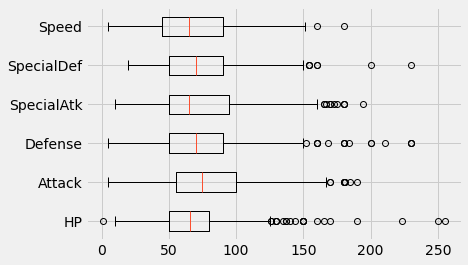

In [16]:
# 箱型圖(用 matplotlib 繪製有點麻煩，直接用 pandas 比較簡單，而套用 seaborn 則有更多變化)
data = df.loc[:, 'HP':'Speed'].T.values.tolist()
plt.boxplot(data, labels=df.columns[4:10], vert=False);

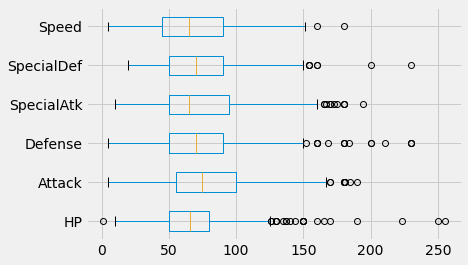

In [17]:
df.loc[:, 'HP':'Speed'].boxplot(vert=False);

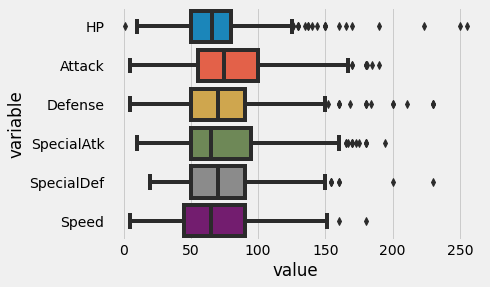

In [18]:
sns.boxplot(x="value", y="variable", orient='h', 
            data=pd.melt(df.loc[:, 'HP':'Speed'])); # pd.melt()把多個欄位合併成一個

Text(0, 0.5, 'Defense')

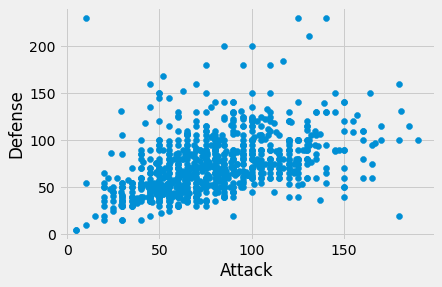

In [19]:
# 散佈圖
plt.scatter(df['Attack'], df['Defense'], marker='o')
plt.xlabel('Attack')
plt.ylabel('Defense')

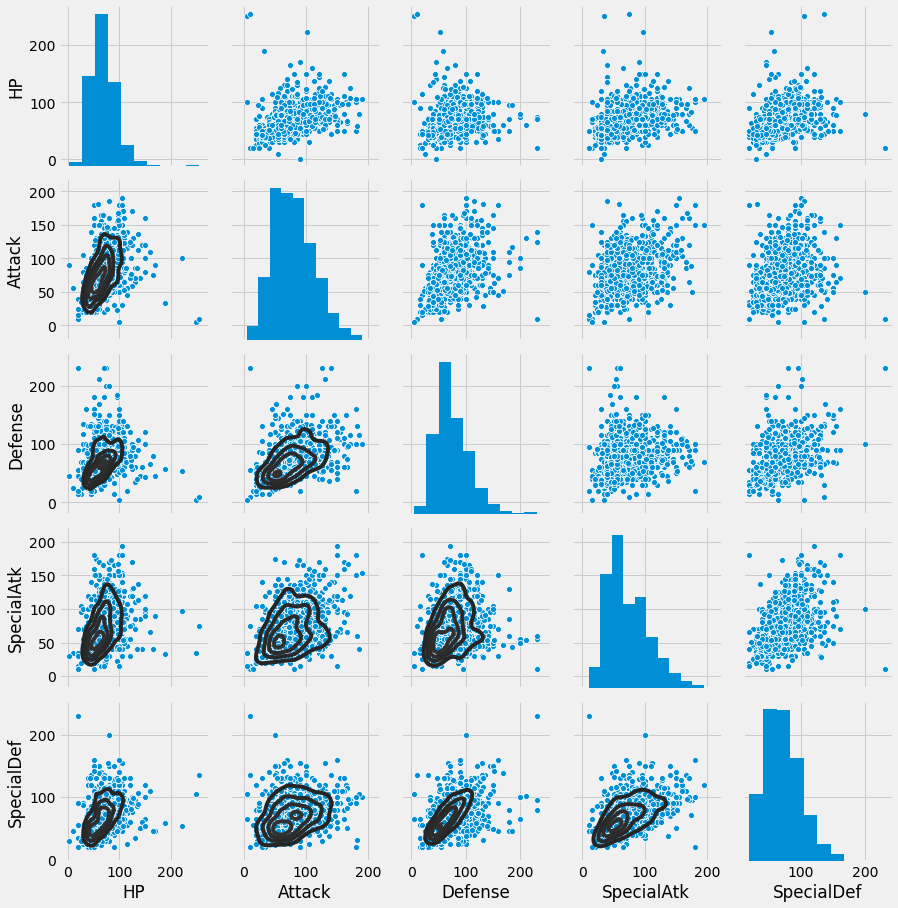

In [20]:
g = sns.pairplot(df.loc[:, 'HP':'SpecialDef'])
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [21]:
df_new = pd.DataFrame(columns=['屬性', '數量', '平均防禦力'])
lst_type1 = ['Bug', 'Electric']
poke = df[df['Type1'] == lst_type1[0]]
df_new.loc[0] = [lst_type1[0], len(poke), poke.Defense.mean()]
poke = df[df['Type1'] == lst_type1[1]]
df_new.loc[1] = [lst_type1[1], len(poke), poke.Defense.mean()]
df_new.head()

,屬性,數量,平均防禦力
0,Bug,78,71.358974
1,Electric,49,66.959184


In [22]:
df_new = pd.DataFrame(columns=['屬性', '單/雙屬性', '數量', '平均防禦力'])

for i, x in enumerate(lst_type1):
    poke = df[(df['Type1']==x) & (pd.isnull(df['Type2']))]
    df_new.loc[2*i] = [x, '單', len(poke), poke.Defense.mean()]
    poke = df[(df['Type1']==x) & (pd.notnull(df['Type2']))]
    df_new.loc[2*i+1] = [x, '雙', len(poke), poke.Defense.mean()]

df_new

,屬性,單/雙屬性,數量,平均防禦力
0,Bug,單,18,54.833333
1,Bug,雙,60,76.316667
2,Electric,單,29,56.517241
3,Electric,雙,20,82.100000
